# Practical exam

In [15]:
### Please state your name here:


In [16]:
# make sure requirements are up to date
%pip install --upgrade pip >> results/requirements_log.txt
%pip install -r ../requirements.txt >> results/requirements_log.txt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 1.

Given the below snippet, add the necessary code lines in function f2 in order to obtain the expected output:

In [17]:
def f2(n):
    for i in range(1, n):
        yield(f"~~~ {i}")
        yield{"cubed": i**3}
        yield{"square":i**2}
        yield(f"@@@ {i}")




n = 5
for x in f2(n):
    print(x)

~~~ 1
{'cubed': 1}
{'square': 1}
@@@ 1
~~~ 2
{'cubed': 8}
{'square': 4}
@@@ 2
~~~ 3
{'cubed': 27}
{'square': 9}
@@@ 3
~~~ 4
{'cubed': 64}
{'square': 16}
@@@ 4


Expected output:

```
~~~ 1
{'cubed': 1}
{'squared': 1}
@@@ 1
~~~ 2
{'cubed': 8}
{'squared': 4}
@@@ 2
~~~ 3
{'cubed': 27}
{'squared': 9}
@@@ 3
~~~ 4
{'cubed': 64}
{'squared': 16}
@@@ 4
```

### 2.

Under **resources**, there are two input files, [input_file_1.csv](/2022/python_workshop/notebooks/resources/input_file_1.csv) and [input_file_2.csv](/2022/python_workshop/notebooks/resources/input_file_2.csv).

Given the two input files, remove the duplicates.

If rows in all files are combined, there must be NO duplicates. Solution should include 2 functions, one for reading data from files and one for writing data to files. A partial solution without functions is accepted.

Expected output: two separate output files under results/expected, [output_file_1.csv](/2022/python_workshop/notebooks/results/expected/output_file_1.csv) and [output_file_2.csv](/2022/python_workshop/notebooks/results/expected/output_file_2.csv).

In [109]:
def read_csv(file):
    for row in open(file, "r"):
        yield row

def no_duplicates(file):
   return { e.strip("\n")+'\n' for e in file}

def write_to_file(input, file):
    for e in input:
        file.write(e)


def output(first_file,second_file,output_first,output_second):

    out_first=open(output_first,"a")
    out_second=open(output_second,"a")

    out_first.write(next(first_file))
    out_second.write(next(second_file))

    without_dup_1=no_duplicates(first_file)
    write_to_file(without_dup_1,out_first)

    without_dup_2=no_duplicates(second_file)

    for el in without_dup_1:
        without_dup_2.remove(el)

    write_to_file(without_dup_2,out_second)





In [110]:
csv_content_1=read_csv("./resources/input_file_1.csv")
csv_content_2=read_csv("./resources/input_file_2.csv")

output(csv_content_1,csv_content_2,"./resources/output_file_1.csv","./resources/output_file_2.csv")


### 3.

Using the [data.gov.ro](https://data.gov.ro/dataset/acreditarea-unitatilor-sanitare-2021) API, extract the "accredited hospitals 2021" data set (link available below).

Alternatively, if the API is down, use the backup file **hospitals.csv** from the **resources** folder as a source.

In [21]:
import requests
import pandas as pd

In [22]:
url_hospitals = 'https://data.gov.ro/dataset/4197b53e-7c91-4fcc-be07-883076d40ffc/resource/7a343719-d625-4b5c-98b5-895a684d61c4/download/anmcs-acreditare-unitati-sanitare-dec2021.json'


hospitals = pd.DataFrame(requests.get(url_hospitals).json())

hospitals.head()

,Nr. Crt.,Nume,Cod A.N.M.C.S.,Judet,Clasificare,TIP USP (in functie de specificul patologiei tratate),TIP USP (in functie de regimul proprietatii),TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale),Adresa completa a sediului principal,Adresa email oficiala,Website,Autoritatea tutelara,Acreditare ciclul I,Acreditare ciclul II,,__1,__2
0,1,SPITALUL MUNICIPAL CALAFAT,A001,Dolj,IV,general,public,fara invatamant,"B-dul. T. Vladimirescu, Nr. 24, Calafat, cod 2...",spitalcalafat@gmail.com,spitalcalafat.ro,PRIMARIA MUNICIPIULUI CALAFAT,Acreditat,Categoria V Decizie de prelungire a procesului...,,,
1,2,SPITALUL DE PSIHIATRIE CRONICI SCHITU GRECI,A002,Olt,V,afectiuni cronice,public,fara invatamant,SLATINA STR. A. I. CUZA NR. 14,spitalulschitu@gmail.com,www.spitalul-schitu.ro,CONSILIUL JUDETEAN OLT,Acreditat,Categoria V Decizie de prelungire a procesului...,,,
2,3,SPITALUL CLINIC NICOLAE MALAXA,A003,Bucuresti,III,general,public,clinic cu sectii universitare,"STR. DIMITRIE CANTEMIR, NR.1, PARTER, SECT.4, ...",secretariat@spitalmalaxa.ro,www.spitalmalaxa.ro,ASSMB,Acreditat,Categoria IV Acreditat cu incredere redusa,,,
3,4,"SPITALUL MILITAR DE URGENTA ""REGINA MARIA"" BRA?OV",A004,Brasov,III,urgenta,public,fara invatamant,"Bucuresti, Str. Institutul Medico-Militar, Nr....",smureginamaria@rdsbv.ro,www.smubrasov.ro,DIRECtIA MEDICALa a Ministerului Apararii Nati...,Acreditat,Categoria II Acreditat cu recomandari,,,
4,5,SPITALUL ORASENESC INEU,A005,Arad,IV,general,public,fara invatamant,"Calea Republicii, nr. 5",spitalineu@yahoo.ro,http://www.spitalineu.ro,Primaria Orasului Ineu,Acreditat,Categoria V Decizie de prelungire a procesului...,,,


How many rows are in this dataset?

In [23]:
hospitals.shape[0]

1365

What are the columns in this dataset?

In [24]:
hospitals.columns

Index(['Nr. Crt.', 'Nume', 'Cod A.N.M.C.S.', 'Judet', 'Clasificare',
       'TIP USP (in functie de specificul patologiei tratate)',
       'TIP USP (in functie de regimul proprietatii)',
       'TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale)',
       'Adresa completa a sediului principal', 'Adresa email oficiala',
       'Website', 'Autoritatea tutelara', 'Acreditare ciclul I',
       'Acreditare ciclul II', '', '__1', '__2'],
      dtype='object')

Drop the unnecessary columns:
* Nr. Crt.
* TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale)
* the last three columns

In [25]:
hospitals.drop(columns=['Nr. Crt.','TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale)','Acreditare ciclul II','__1','__2'],axis=1,inplace=True)

In [26]:
hospitals.head(1)

,Nume,Cod A.N.M.C.S.,Judet,Clasificare,TIP USP (in functie de specificul patologiei tratate),TIP USP (in functie de regimul proprietatii),Adresa completa a sediului principal,Adresa email oficiala,Website,Autoritatea tutelara,Acreditare ciclul I,
0,SPITALUL MUNICIPAL CALAFAT,A001,Dolj,IV,general,public,"B-dul. T. Vladimirescu, Nr. 24, Calafat, cod 2...",spitalcalafat@gmail.com,spitalcalafat.ro,PRIMARIA MUNICIPIULUI CALAFAT,Acreditat,


Apply the following transformations to the columns, so that they are easier to work with:
* lowercase all columns
* `TIP USP (in functie de specificul patologiei tratate)` rename to `tip_patologie`
* `TIP USP (in functie de regimul proprietatii)` rename to `tip`
* `Adresa completa a sediului principal` rename to `adresa`
* `Adresa email oficiala` rename to `email`
* `Autoritatea tutelara` rename to `autoritate_tutelara`
* `Acreditare ciclul I` rename to `acreditare_i`
* `Acreditare ciclul II` rename to `acreditare_ii`

In [27]:


hospitals.rename(
    columns={
        'TIP USP (in functie de specificul patologiei tratate)':'tip_patologie',
        'TIP USP (in functie de regimul proprietatii)':'tip',
        'Adresa completa a sediului principal':'adresa',
        'Adresa email oficiala':'email',
        'Autoritatea tutelara':'autoritate_tutelara',
        'Acreditare ciclul I':'acreditare_i'
        
    },
    inplace=True
)
hospitals=hospitals.rename(columns=lambda x: x.lower())


In [28]:

hospitals.head()

,nume,cod a.n.m.c.s.,judet,clasificare,tip_patologie,tip,adresa,email,website,autoritate_tutelara,acreditare_i,
0,SPITALUL MUNICIPAL CALAFAT,A001,Dolj,IV,general,public,"B-dul. T. Vladimirescu, Nr. 24, Calafat, cod 2...",spitalcalafat@gmail.com,spitalcalafat.ro,PRIMARIA MUNICIPIULUI CALAFAT,Acreditat,
1,SPITALUL DE PSIHIATRIE CRONICI SCHITU GRECI,A002,Olt,V,afectiuni cronice,public,SLATINA STR. A. I. CUZA NR. 14,spitalulschitu@gmail.com,www.spitalul-schitu.ro,CONSILIUL JUDETEAN OLT,Acreditat,
2,SPITALUL CLINIC NICOLAE MALAXA,A003,Bucuresti,III,general,public,"STR. DIMITRIE CANTEMIR, NR.1, PARTER, SECT.4, ...",secretariat@spitalmalaxa.ro,www.spitalmalaxa.ro,ASSMB,Acreditat,
3,"SPITALUL MILITAR DE URGENTA ""REGINA MARIA"" BRA?OV",A004,Brasov,III,urgenta,public,"Bucuresti, Str. Institutul Medico-Militar, Nr....",smureginamaria@rdsbv.ro,www.smubrasov.ro,DIRECtIA MEDICALa a Ministerului Apararii Nati...,Acreditat,
4,SPITALUL ORASENESC INEU,A005,Arad,IV,general,public,"Calea Republicii, nr. 5",spitalineu@yahoo.ro,http://www.spitalineu.ro,Primaria Orasului Ineu,Acreditat,


The total number of hospitals in this dataset is 762, however the actual number of rows is greater than that.

Identify and remove the empty (blank space) rows.

In [29]:
hospitals=hospitals[hospitals["nume"]!='']

How many public hospitals and how many private hospitals are in this dataset?

In [30]:
publice=hospitals[hospitals["tip"]=="public"].count()[0]
private=hospitals[hospitals["tip"]=="privat"].count()[0]

print(f"Publice={publice} Private={private}")

Publice=380 Private=382


In [ ]:
#??????????????????
publice = hospitals[hospitals.iloc[:, 5] == 'public']
private = hospitals[hospitals.iloc[:, 5] == 'privat']

print(f"There are {publice.shape[0]} public hospitals and {private.shape[0]} private hospitals.")

There are 380 public hospitals and 382 private hospitals.


Inspect the values in the `acreditare_i` column + print them.

In [ ]:
hospitals["acreditare_i"].unique()

array(['Acreditat', 'Neacreditat', '-'], dtype=object)

Create a dataframe containing the hospitals that are *not* accredited.

In [34]:
unaccredited_hospitals=hospitals[hospitals["acreditare_i"]!='Acreditat']
unaccredited_hospitals.head()

,nume,cod a.n.m.c.s.,judet,clasificare,tip_patologie,tip,adresa,email,website,autoritate_tutelara,acreditare_i,
188,SOCIETATEA DR IRIMIA SRL,A50009,Arges,Neclasificat,general,privat,"PITESTI, str.Negru Voda, nr.3-5",infodririmia@yahoo.ro,www.dririmia.ro,SC DR.IRIMIA SRL,Neacreditat,
214,SPITALUL ORASENESC FAUREI,A50035,Braila,V,general,public,"STR.REPUBLICII,NR.46",spit_or_faurei@yahoo.com,www.spitalfaurei.ro,CONSILIUL LOCAL FAUREI,Neacreditat,
424,S.C. MUNTENIA MEDICAL COMPETENCES S.A,B001,Arges,V,general,privat,"Arges, Pitesti, Str. Pictor N Grigorescu nr. 2 A",office@munteniahospital.ro,www.munteniahospital.ro,Muntenia Medical Competences S.A,-,
425,SPITALUL MUNICIPAL CODLEA,B002,Brasov,V,general,public,"CODLEA, STR. LUNGA NR. 33",spitalulcodlea@yahoo.com,www.spitalulcodlea.ro,CONSILIUL LOCAL CODLEA,-,
426,SOCIETATEA CENTRUL MEDICAL POLICLINICO DI MONZ...,B004,Bucuresti,V,general,privat,str. Tony Bulandra nr.27,secretariat@spitalulmonza.ro,www.spitalulmonza.ro,SC CENTRUL MEDICAL POLICLINICO DI MONZA SRL,-,


How many hospitals are *not* accredited?

In [36]:
unaccredited_hospitals.shape[0]

340

Pick a county (judet) for a more in-depth analysis.
(Bucuresti is also a county)

In [37]:
judet = 'Bucuresti'

According to this dataset, how many hospitals are in this county?

In [39]:
hospitals[hospitals["judet"]==judet].count()[0]

106

For the chosen county, create a Dataframe that contains the following information:
* judet
* tip (public, privat)
* count of unaccredited hospitals
* count of accredited hospitals

In [77]:
stat = {
    "judet":[],
    "tip":[],
    "unaccredited":[],
    "accredited":[]
}

statDf=pd.DataFrame(stat)

statDf["judet"]=hospitals[hospitals["judet"]==judet]["judet"]
statDf["tip"]=hospitals[hospitals["judet"]==judet]["tip"]
statDf["unaccredited"]= (hospitals[["acreditare_i"]][hospitals["judet"]==judet]!="Acreditat").astype(int)
statDf["accredited"]= (hospitals[["acreditare_i"]][hospitals["judet"]==judet]=="Acreditat").astype(int)
statDf.head()

,judet,tip,unaccredited,accredited
2,Bucuresti,public,0,1
16,Bucuresti,public,0,1
18,Bucuresti,privat,0,1
21,Bucuresti,public,0,1
22,Bucuresti,public,0,1


Create a plot that highlights
* the number of accredited public hospitals
* the number of accredited private hospitals
* the number of unaccredited public hospitals
* the number of unaccredited private hospitals

The expected output for Bucuresti can be found  [here](/2022/python_workshop/notebooks/results/expected/output_test.png).

In [78]:
%config InlineBackend.figure_formats = ['svg']

In [89]:



plot_acreditat =statDf.pivot_table(index="tip",columns="judet",values="accredited",aggfunc="sum")
plot_acreditat.head()

judet,Bucuresti
tip,
privat,12
public,49


<AxesSubplot:title={'center':'Acreditat'}, xlabel='tip', ylabel='accredited'>

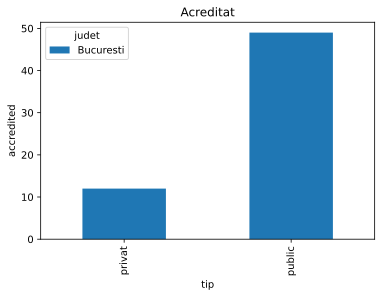

In [94]:
plot_acreditat.plot(title="Acreditat",ylabel="accredited",kind="bar")

In [92]:
plot_neacreditat = statDf.pivot_table(index="tip",columns="judet",values="unaccredited",aggfunc="sum")

<AxesSubplot:title={'center':'Neacreditat'}, xlabel='tip', ylabel='accredited'>

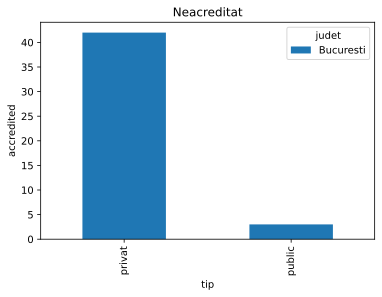

In [95]:
plot_neacreditat.plot(title="Neacreditat",ylabel="accredited",kind="bar")

In [99]:
from functools import reduce
plot_data = reduce(lambda  left,right: pd.merge(left,right,on=["tip"], how='inner'), [plot_acreditat, plot_neacreditat])
plot_data.head()

judet,Bucuresti_x,Bucuresti_y
tip,,
privat,12,42
public,49,3


<AxesSubplot:xlabel='tip'>

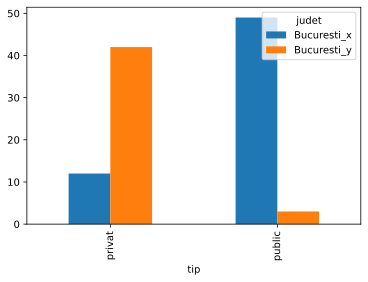

In [97]:
plot_data.plot(kind="bar")